# <Center> About Dataset <br><br>

<center> <img src="../images/shoping_cart.gif" alt="metodo de tamaño de muestra" width="450"> <br>

Context<br><br>
Problem Statement<br>
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. <br><br>
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content <br> <br>

Attributes<br><br>

People <br><br>
- ID: Customer's unique identifier <br>
- Year_Birth: Customer's birth year <br>
- Education: Customer's education level <br>
- Marital_Status: Customer's marital status <br>
- Income: Customer's yearly household income <br>
- Kidhome: Number of children in customer's household <br>
- Teenhome: Number of teenagers in customer's household <br>
- Dt_Customer: Date of customer's enrollment with the company <br>
- Recency: Number of days since customer's last purchase <br>
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise <br>

Products <br><br>
- MntWines: Amount spent on wine in last 2 years <br>
- MntFruits: Amount spent on fruits in last 2 years <br>
- MntMeatProducts: Amount spent on meat in last 2 years <br>
- MntFishProducts: Amount spent on fish in last 2 years <br>
- MntSweetProducts: Amount spent on sweets in last 2 years <br>
- MntGoldProds: Amount spent on gold in last 2 years <br>

Promotion <br><br>
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise <br>

Place <br><br>
- NumWebPurchases: Number of purchases made through the company’s website <br>
- NumCatalogPurchases: Number of purchases made using a catalogue <br>
- NumStorePurchases: Number of purchases made directly in stores <br>
- NumWebVisitsMonth: Number of visits to company’s website in the last month <br>

Target <br><br>
Need to perform clustering to summarize customer segments.


In [2]:
#Importing library 

from copy import deepcopy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

# quitar warnings
import warnings
#FutureWarning , seaborn
warnings.filterwarnings("ignore", category = FutureWarning, message="The figure layout has changed to tight")

In [3]:
# Import data set 
data = pd.read_csv('../data set/marketing_campaign.csv', sep = ';')
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0


# Data description

In [4]:
# Asegúrate de que la columna de fecha de nacimiento sea de tipo datetime
data["Year_Birth"] = pd.to_datetime(data["Year_Birth"])

# Calcula la edad actual restando la fecha de nacimiento del día actual
df["age"] = (datetime(2023, 7, 28) - df["Fecha_Nacimiento"]).astype('<m8[Y]')

NameError: name 'datetime' is not defined

In [ ]:


# Calcula la edad actual restando la fecha de nacimiento del día actual
df["Edad"] = (datetime.now() - df["Fecha_Nacimiento"]).astype('<m8[Y]')

# Muestra el DataFrame con la nueva columna de Edad
print(df)

In [ ]:
sns.pairplot(data= data)

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000016A60A06320> (for post_execute):


KeyboardInterrupt: 

# Data validation

In [ ]:
# shape of data 

print(f'The sahape of de data is: {data.shape}') 

The sahape of de data is: (2240, 29)


In [ ]:
#  variables type
(
    data
    .dtypes
    .value_counts()
)

int64      25
object      3
float64     1
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#0b032d;font-family:newtimeroman;color:#f4c095;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   

* dd

In [ ]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Note: <br><br>
- They are int64 25, object 3 and float64 1 <br>
- the variabble Dt_Customer need to be transformed to datatime
- the variables  Education, Marital_Status need to be transformed <br>
- There are missing values for some variables, more will be discussed later. <br>

## counts plots

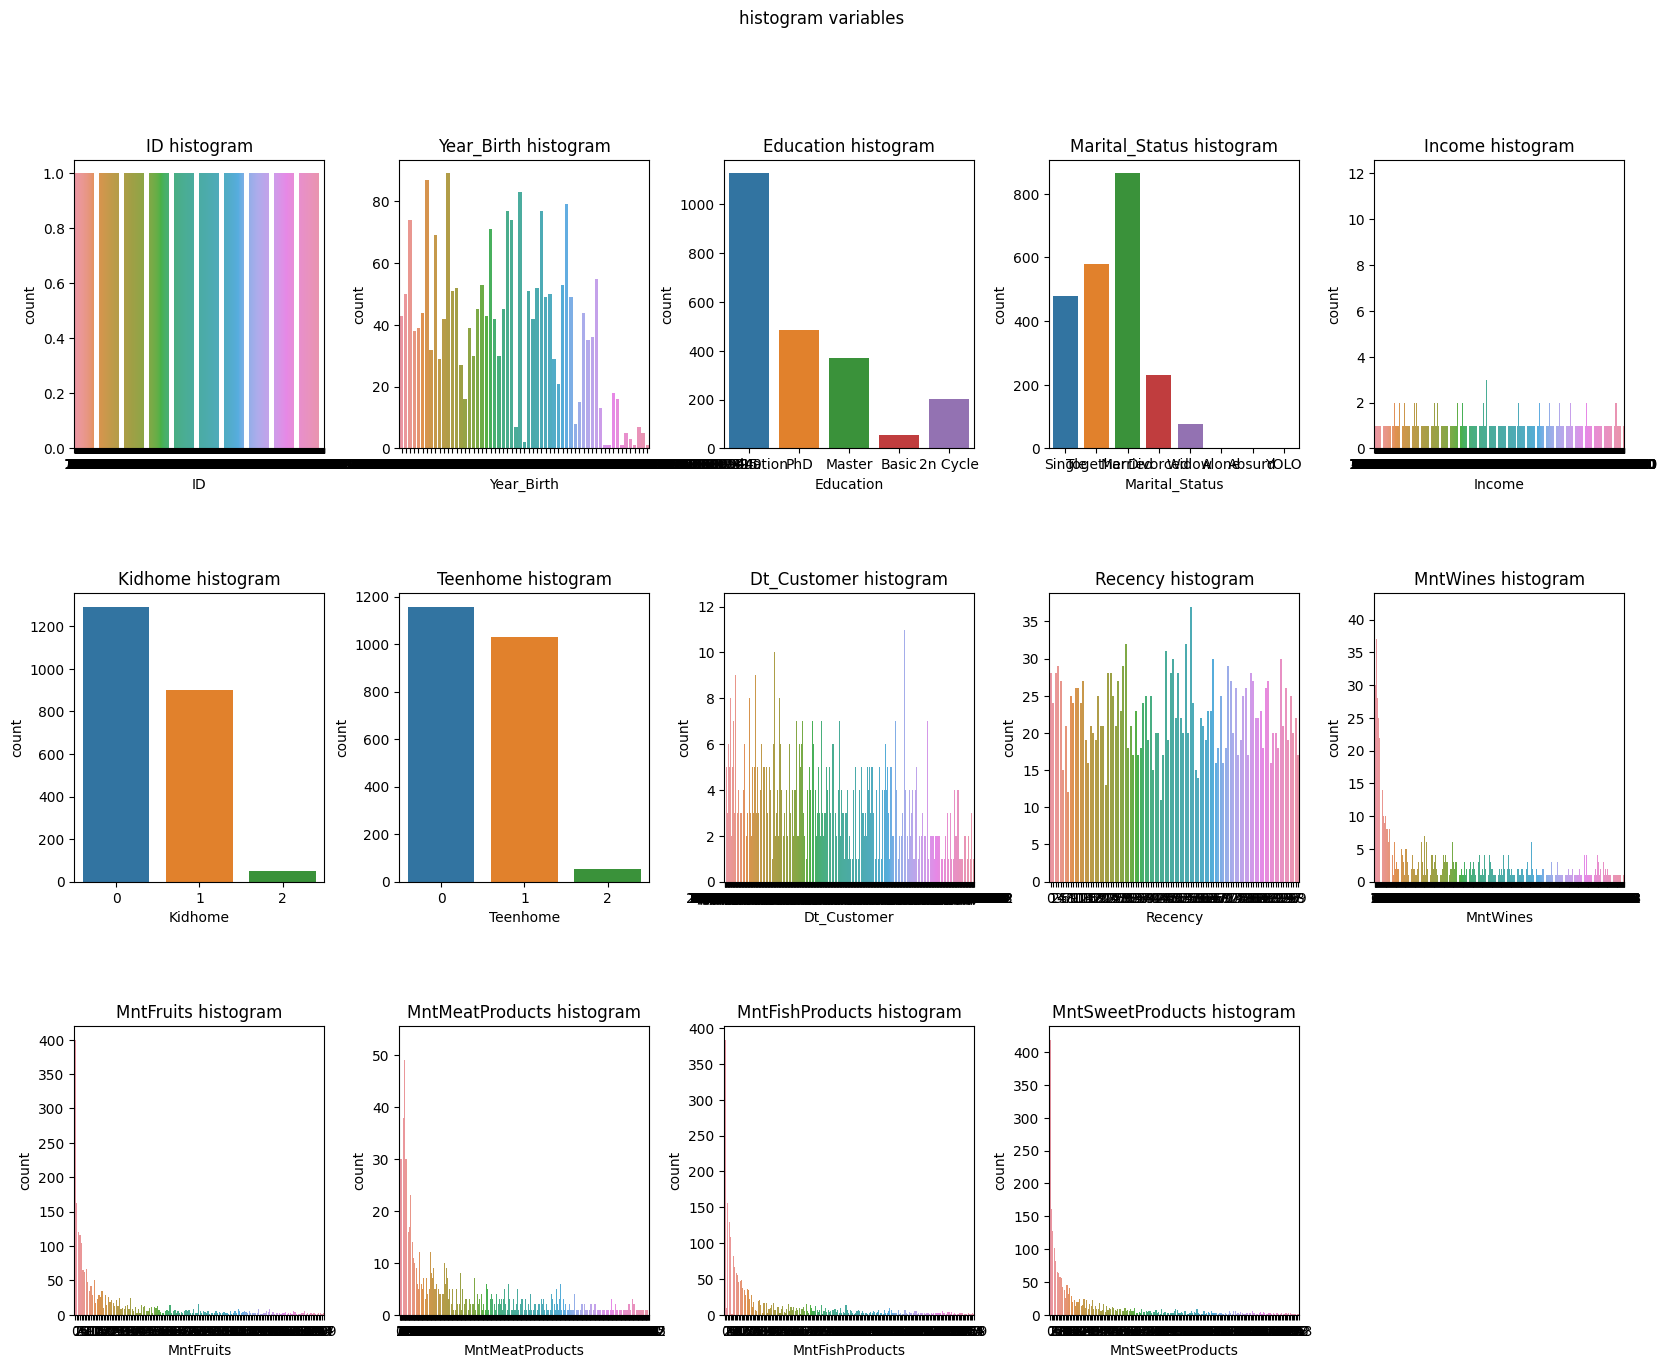

In [5]:
# list of features
vars_to_plot = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

# size of plot
fig = plt.figure(figsize=(20, 15))

# loop 
for i, var in enumerate(vars_to_plot):
    plt.subplot(3, 5, i+1)
    sns.countplot(data = data, x = var)
    plt.title(f'{var} histogram')
    
plt.suptitle('histogram variables ')
plt.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust the space between images
plt.show()

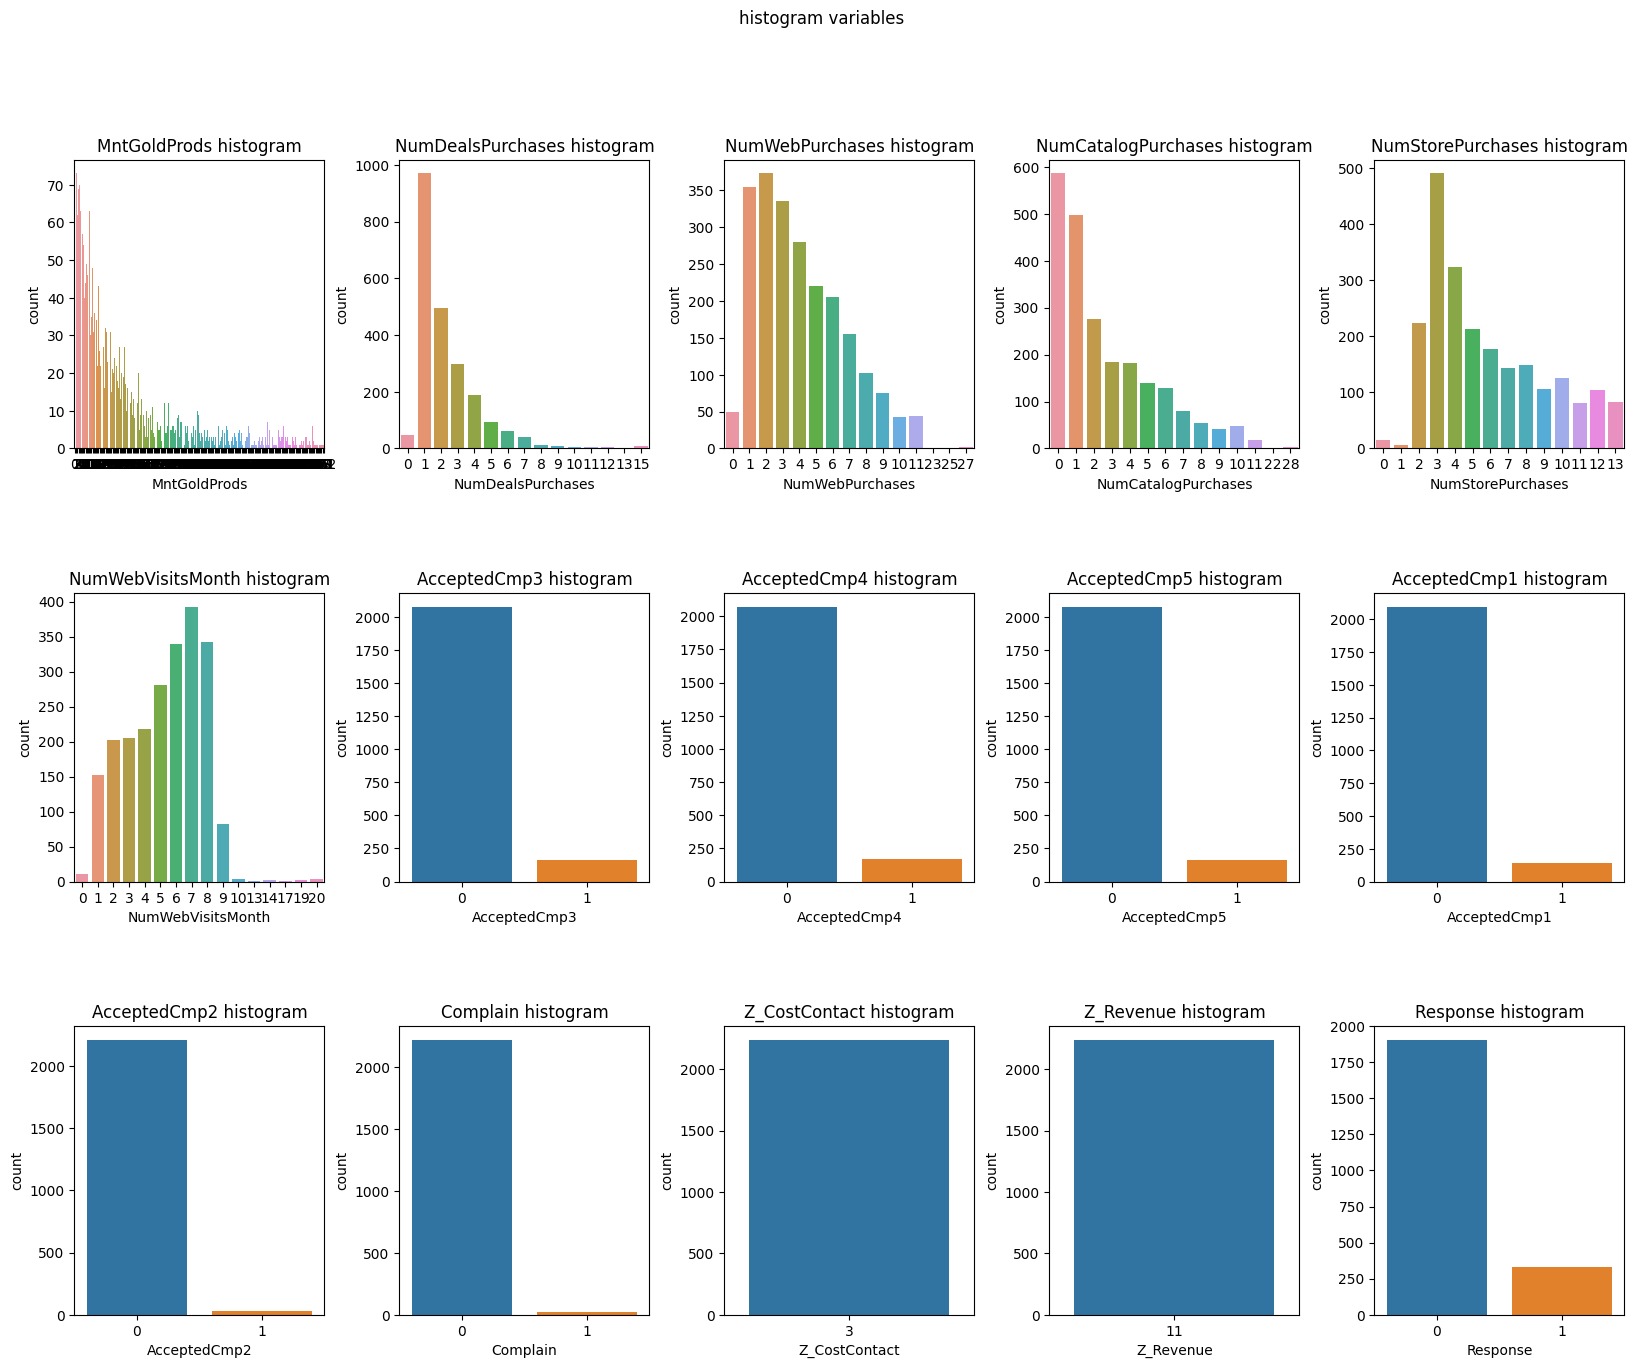

In [9]:
# list of features
vars_to_plot = [
'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

# size of plot
fig = plt.figure(figsize=(20, 15))

# loop 
for i, var in enumerate(vars_to_plot):
    plt.subplot(3, 5, i+1)
    sns.countplot(data = data, x = var)
    plt.title(f'{var} histogram')
    
plt.suptitle('histogram variables ')
plt.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust the space between images
plt.show()

Note: <br>

- The following variables are removed <br>
    - ID
    - Z_CostContact
    - Z_Revenue

# Distrubucion

In [10]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

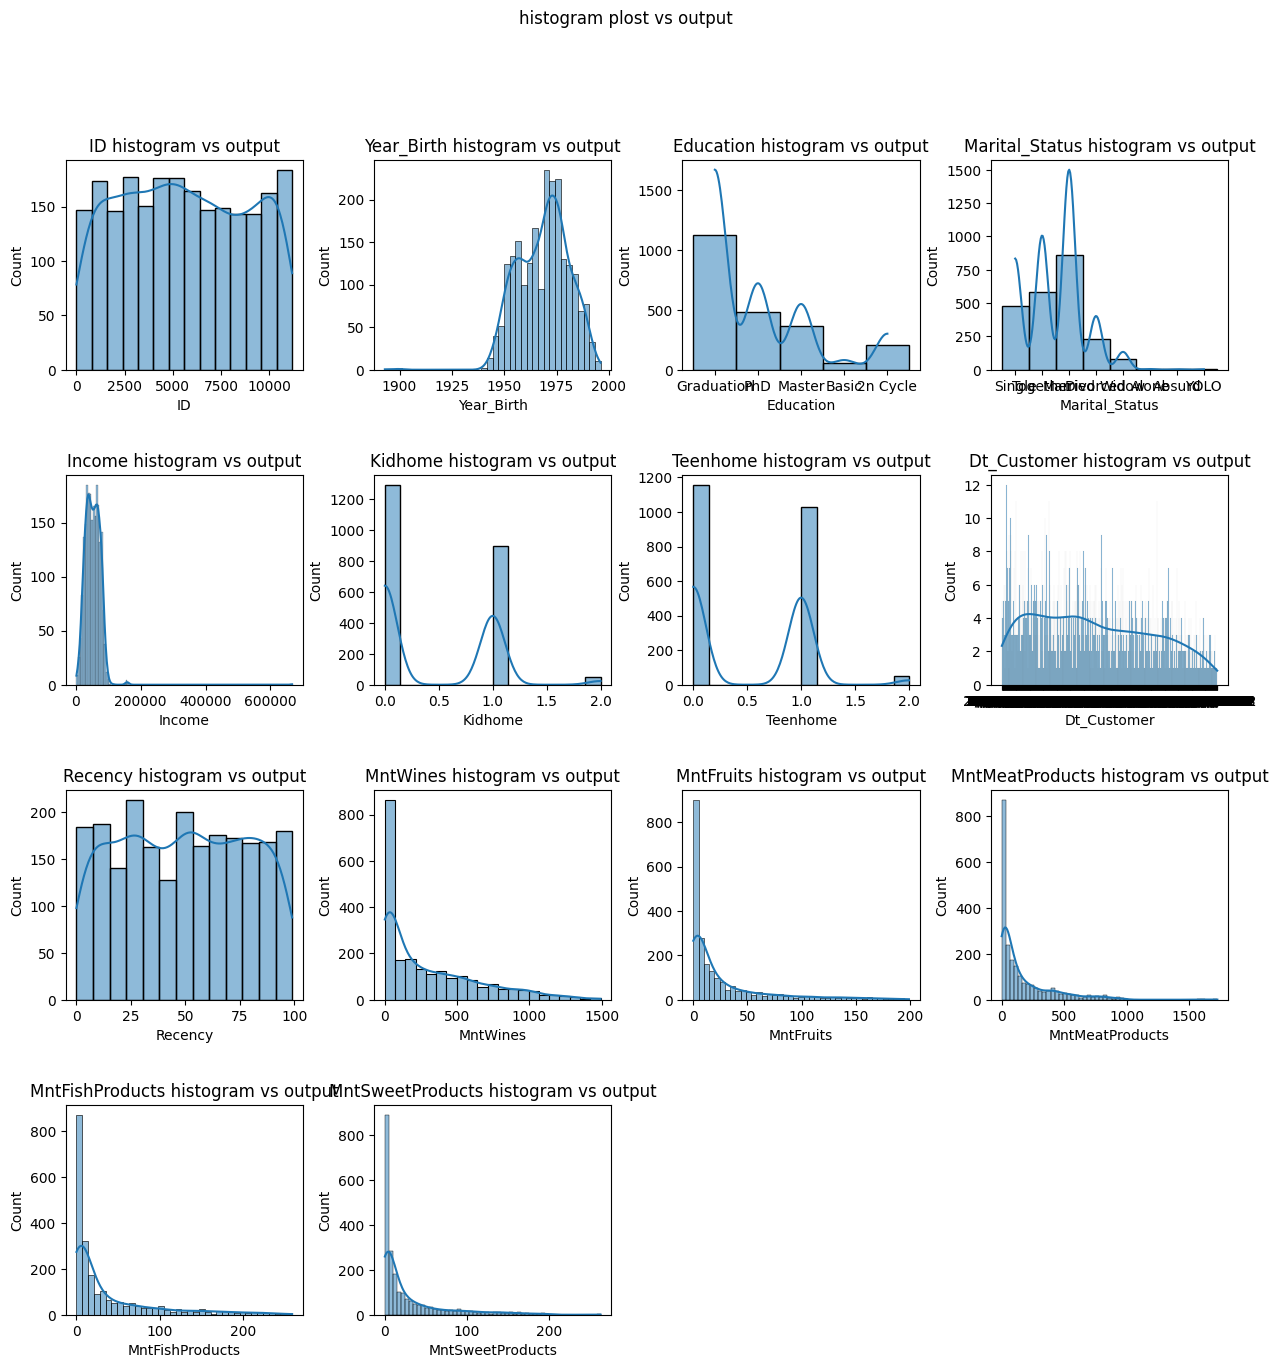

In [11]:
# list of features
vars_to_plot = [ 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
    'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'
    ]

# size of plot
fig = plt.figure(figsize=(15, 15))

# loop 
for i, var in enumerate(vars_to_plot):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=data, x=var, kde = True,)
    plt.title(f'{var} histogram vs output')
    
plt.suptitle('histogram plost vs output ')
plt.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust the space between images
plt.show()

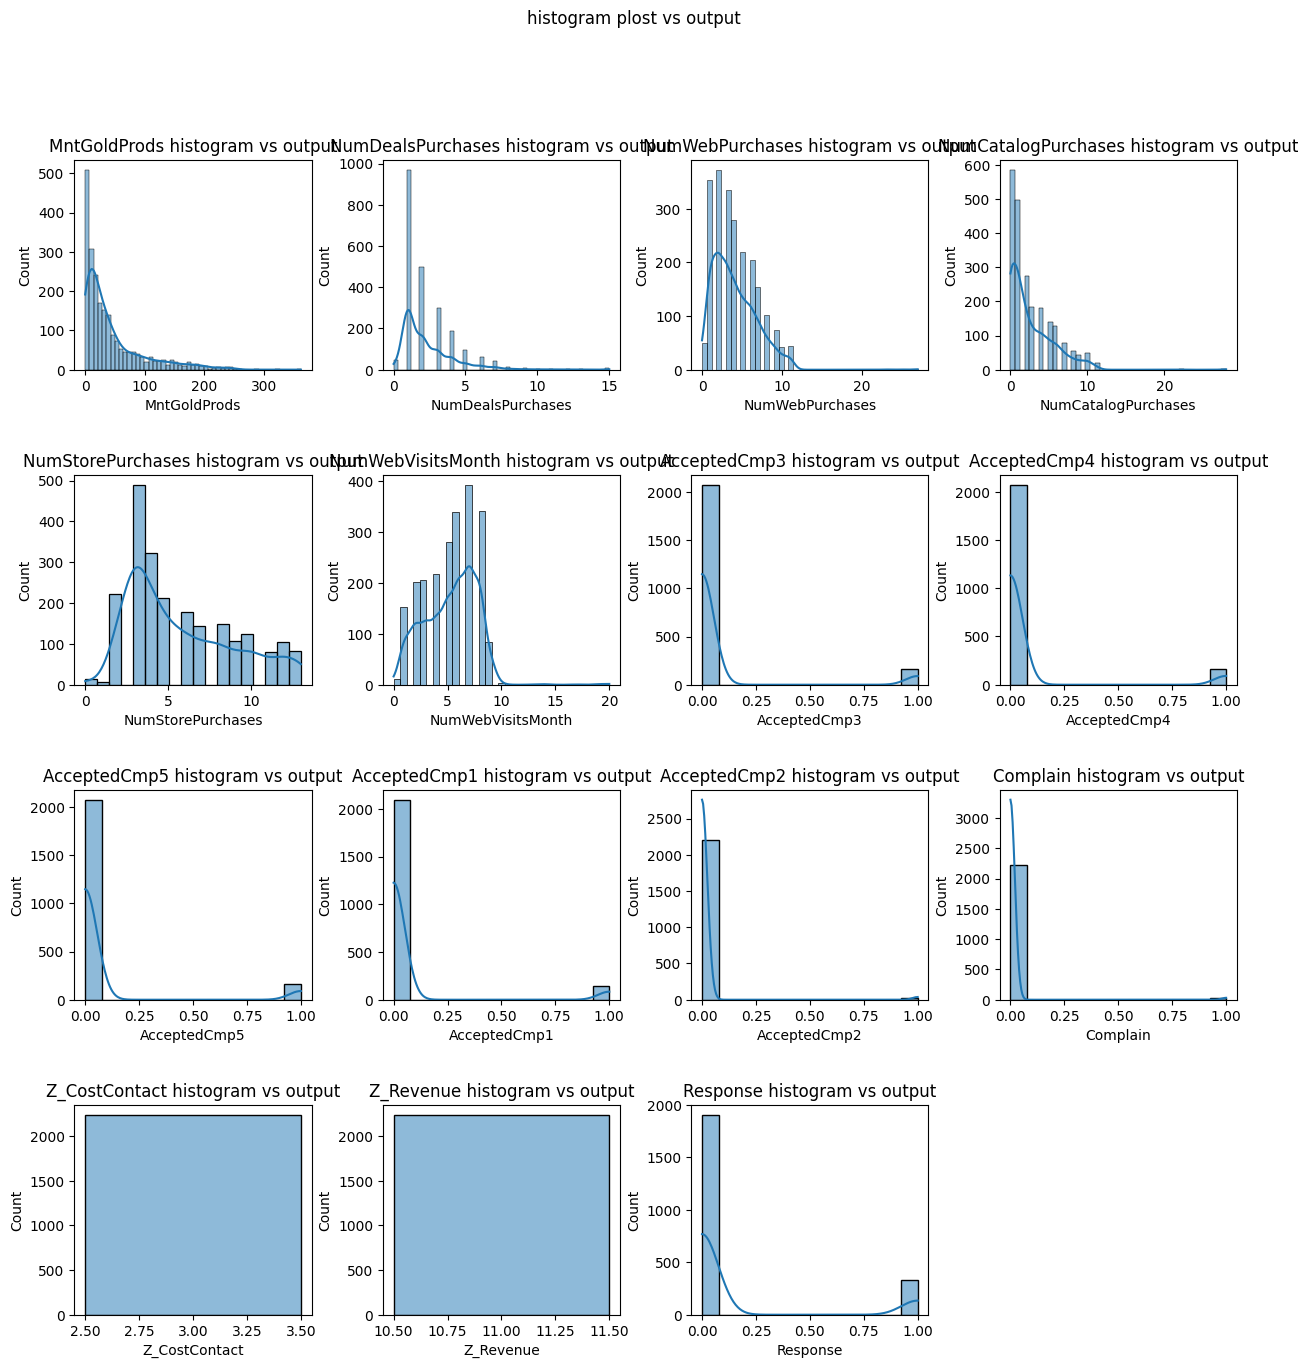

In [12]:
# list of features
vars_to_plot = [
'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


# size of plot
fig = plt.figure(figsize=(15, 15))

# loop 
for i, var in enumerate(vars_to_plot):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=data, x=var, kde = True,)
    plt.title(f'{var} histogram vs output')
    
plt.suptitle('histogram plost vs output ')
plt.subplots_adjust(hspace=0.5, wspace=0.3) # Adjust the space between images
plt.show()

Note: <br><br>
- Non normal distribution of the variables
- The variables Z_CostContact and Z_Revenue will be deleter

# Data transforming 

In [13]:
# copy of the data is made for tranforming without broke original data.
data_cleaning = deepcopy(data)

In [14]:
# imputation valuos
data_cleaning['Income'].fillna(data_cleaning['Income'].mean(), inplace=True)


# transforming Dt_Customer to datatime
data_cleaning['Dt_Customer'] = pd.to_datetime(data_cleaning['Dt_Customer'], format = '%d/%m/%Y')

# Education ecoding 
data_cleaning['Education'].replace({'Basic':1, 'Graduation': 2, '2n Cycle': 3, 'Master': 4, 'PhD': 5}, inplace = True)


# transforming one hot
data_dummies = pd.get_dummies(data_cleaning['Marital_Status'], drop_first = True, dtype=int)

# Concatenate the original DataFrame with the new one-hot columns
data_cleaning = pd.concat([data_cleaning, data_dummies], axis = 1)

# Remove the original columns, as they are now hard-coded into one-hot columns
data_cleaning.drop('Marital_Status', axis=1, inplace=True)


# Delete redundant variables
data_cleaning.drop(['Z_Revenue', 'Z_CostContact' ], axis = 1, inplace= True)


data_cleaning.head(2)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Response,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,5524,1957,2,58138.0,0,0,2012-09-04,58,635,88,...,0,0,1,0,0,0,1,0,0,0
1,2174,1954,2,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,1,0,0,0
